# $K$-Nearest Neighbors ($K$-NN)

$k$-NN é um algoritmo de aprendizagem de máquina supervisionado que pode ser usado tanto para classificação quanto para regressão.



# Exercícios:

A idade de um abalone pode ser encontrada cortando sua concha e contando o número de anéis. O dataset Abalone apresenta esse número de anéis, assim como outras medidas físicas.

O nosso objetivo aqui é conseguir estimar a idade do abalone baseando-se apenas nessas outras medidas físicas, permitindo conhecer a idade sem contar os anéis.

### 1. Crie um modelo otimizando o hiperparâmetro $k$ utilizando um grid search. Utilize valores de $k$ entre 1 e 50.



#### Importando o dataset abalone

In [41]:
import pandas as pd
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
# com o pandas, conseguimos ler um arquivo CSV diretamente de uma URL
abalone = pd.read_csv(url, header=None)

# mostrar os 5 primeiros registros
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Alterando nomes das colunas

In [42]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone = abalone.drop("Sex", axis=1)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Separando labels e características

In [43]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values
print(X.shape)
print(y.shape)

(4177, 7)
(4177,)


#### Separando dataset em treino e teste

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

#### Criando modelo

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()

#### Usando o GridSearch com valores de k entre 1 e 50 e treinando modelo

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(1,50))}
grid = GridSearchCV(knn_model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 1.74 s, sys: 4.66 ms, total: 1.74 s
Wall time: 1.73 s
{'n_neighbors': 25}


In [49]:
knn_model = grid.best_estimator_
yfit = knn_model.predict(X_test)

#### Inspecionando o modelo

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, yfit)
rmse = sqrt(mse)
rmse

2.1700197339962175

#### Plotando os resultados

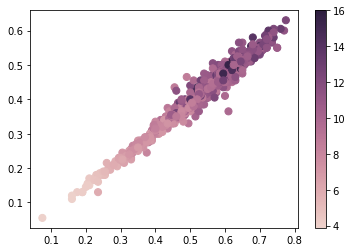

In [51]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=yfit, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

Nesse caso, estamos plotando as 2 primeiras colunas do dataset Abalone, i.e., comprimento e diâmetro. Podemos ver que essas 2 características estão fortemente correlacionadas.

Podemos confirmar essa tendência olhando os `targets` reais do dataset Abalone, simplesmente trocando `yfit` por `y_test` no parâmetro c:


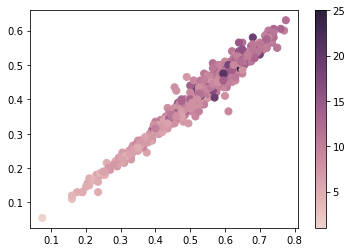

In [58]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

### 2. Otimize o modelo através de um grid search considerando também a média ponderada baseada na distância entre as amostras. Considere também valores de $k$ entre 1 e 50.

#### Criando modelo


In [76]:
knn_model_2 = KNeighborsRegressor()

#### Usando o GridSearch com valores de k entre 1 e 50 e as distâncias entre as amostras e treinando modelo

In [77]:
distancias = ['manhattan',
              'chebyshev',
              'minkowski',
              'hamming',
              'canberra',
              'braycurtis']

In [78]:
param_grid = {
    'n_neighbors': list(range(1,50)),
    'metric': distancias
}

In [79]:
grid = GridSearchCV(knn_model_2, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 20.5 s, sys: 8.53 ms, total: 20.5 s
Wall time: 20.5 s
{'metric': 'manhattan', 'n_neighbors': 21}


In [80]:
knn_model_2 = grid.best_estimator_
yfit = knn_model_2.predict(X_test)

#### Inspecionando o modelo

In [81]:
mse = mean_squared_error(y_test, yfit)
rmse = sqrt(mse)
rmse

2.1743003338701063

#### Plotando os resultados

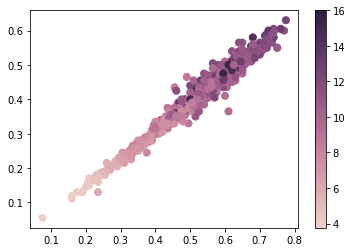

In [82]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=yfit, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()